### Generate Volume Features from Paper

Potential Avenues for Exploration
- Empirical Distribution (Done)
- Serial Correlation

In [14]:
import sys
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

path='/home/jbohn/jupyter/personal/Kernel_Learning'

sys.path.append(path)

In [15]:
quotes=pd.read_csv(f"{path}/data/cleaned_quotes.csv",index_col=0).sort_index()

quotes

/tmp/ipykernel_991/1012748660.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  quotes=pd.read_csv(f"{path}/data/cleaned_quotes.csv",index_col=0).sort_index()


,SIP_Timestamp,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,Source_Of_Quote,...,Best_Bid_Price,Best_Bid_Size,Best_Offer_Exchange,Best_Offer_Price,Best_Offer_Size,LULD_NBBO_Indicator,SIP_Generated_Message_Identifier,Security_Status_Indicator,National_BBO_Ind,date
2020-01-02 09:30:00.134062,2020-01-02 09:30:00.134429,P,AAPL,296.09,1.0,296.29,1.0,R,262393,N,...,296.24,2.0,P,296.29,1.0,NaN,NaN,,2,2020-01-02
2020-01-02 09:30:00.134336,2020-01-02 09:30:00.134554,K,AAPL,296.21,1.0,296.39,1.0,R,262394,N,...,296.21,1.0,P,296.29,1.0,NaN,NaN,,2,2020-01-02
2020-01-02 09:30:00.134532,2020-01-02 09:30:00.134742,K,AAPL,296.10,1.0,296.36,2.0,R,262401,N,...,296.10,1.0,P,296.29,1.0,NaN,NaN,,2,2020-01-02
2020-01-02 09:30:00.136081,2020-01-02 09:30:00.136273,K,AAPL,296.10,1.0,296.29,1.0,R,262424,N,...,296.10,1.0,P,296.29,1.0,NaN,NaN,,2,2020-01-02
2020-01-02 09:30:00.234474,2020-01-02 09:30:00.234700,K,AAPL,296.11,1.0,296.39,1.0,R,263840,N,...,296.11,1.0,P,296.29,1.0,NaN,NaN,,2,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02 19:59:43.952528,2020-01-02 19:59:43.952907,P,AAPL,300.79,2.0,301.34,1.0,R,30868495,N,...,301.10,46.0,K,301.25,2.0,NaN,NaN,,2,2020-01-02
2020-01-02 19:59:52.610437,2020-01-02 19:59:52.610816,P,AAPL,300.79,2.0,301.19,1.0,R,30868577,N,...,301.19,1.0,P,301.19,1.0,NaN,NaN,,2,2020-01-02
2020-01-02 19:59:52.611152,2020-01-02 19:59:52.611527,P,AAPL,300.79,2.0,301.34,1.0,R,30868582,N,...,301.19,1.0,K,301.25,2.0,NaN,NaN,,2,2020-01-02
2020-01-02 19:59:52.611817,2020-01-02 19:59:52.611833,Q,AAPL,301.19,1.0,302.00,6.0,R,30868585,N,...,301.19,1.0,K,301.25,2.0,NaN,NaN,,2,2020-01-02


### Features

In the paper the following features were utilized 
$$F=\{V_t,\frac{V_t}{||{V_t}||_1},V_t-V_{t-1},\frac{V_t-V_{t-1}}{||V_t-V_{t-1}||}\}$$

Where $V_t$ is size of best bid and ask level at time $t$

In [16]:
simple_quotes=quotes[['Exchange','Symbol','Best_Bid_Price','Best_Bid_Size','Best_Offer_Price', 'Best_Offer_Size']]

simple_quotes=simple_quotes
simple_quotes.index=pd.to_datetime(simple_quotes.index)
simple_quotes=simple_quotes.rename(columns={'Best_Bid_Size':'FB0','Best_Offer_Size':'FA0'})
simple_quotes['FB2']=simple_quotes['FB0'].diff(periods=1)
simple_quotes['FA2']=simple_quotes['FA0'].diff(periods=1)
simple_quotes=simple_quotes.dropna()


Note that since we are only looking at the top of the message book, features 1 and 3 trivially are equivalent to features 0 and 2

# Exploratory Data Analysis on distribution of our features 

### Stationary Volume

Text(0.5, 1.0, 'Histogram of Offer Volume')

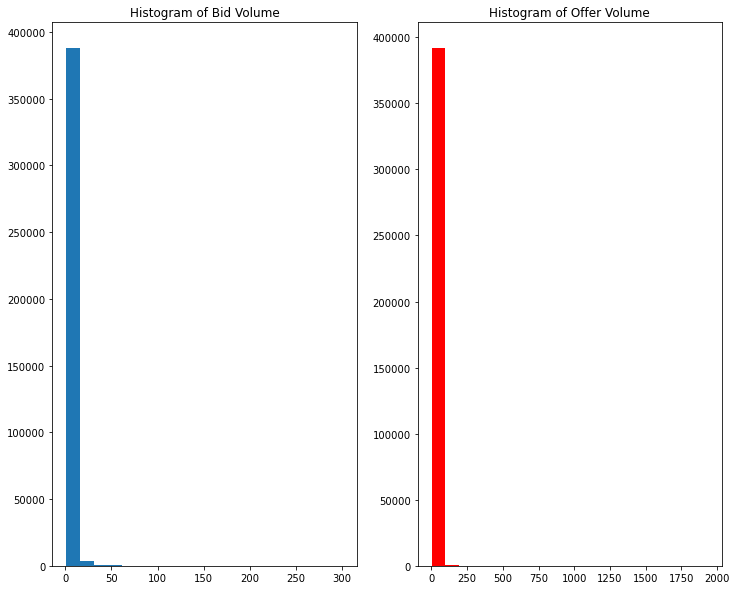

In [17]:
fig,ax=plt.subplots(1,2,figsize=(12,10))

ax[0].hist(simple_quotes['FB0'].values,bins=20)
ax[0].set_title("Histogram of Bid Volume")
ax[1].hist(simple_quotes['FA0'].values,bins=20, color='red')
ax[1].set_title("Histogram of Offer Volume")

### Time Dependent Volume

Text(0.5, 1.0, 'Histogram of Change in Offer Volume')

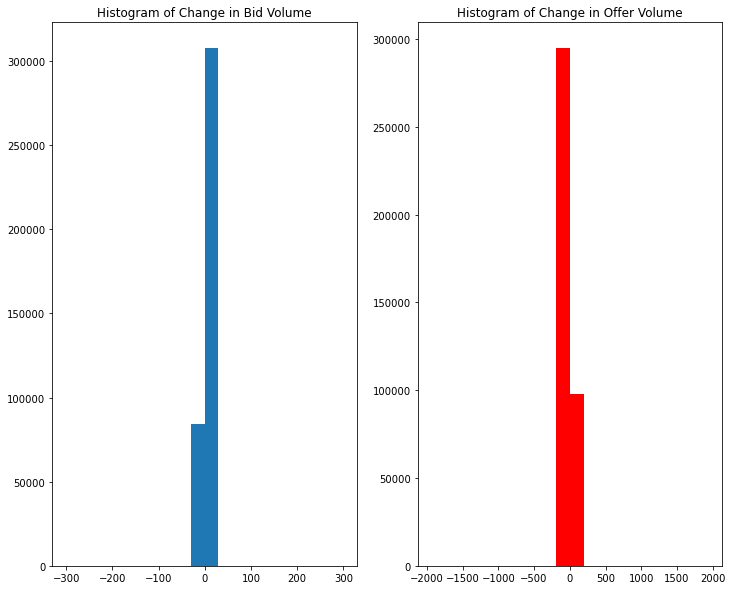

In [18]:
fig,ax=plt.subplots(1,2,figsize=(12,10))

ax[0].hist(simple_quotes['FB2'].values,bins=20)
ax[0].set_title("Histogram of Change in Bid Volume")
ax[1].hist(simple_quotes['FA2'].values,bins=20, color='red')
ax[1].set_title("Histogram of Change in Offer Volume")

### Generate Labels of outcomes 

In paper they used $\triangle =$ 5 , 10, 20, 50 ,100

In [19]:
def gen_interval(quotes,freq):
    start=datetime.strptime( str(str(quotes.index[0].date()) +" 09:30:00") ,"%Y-%m-%d %H:%M:%S")
    end=datetime.strptime( str(str(quotes.index[-1].date()) +" 16:00:00") ,"%Y-%m-%d %H:%M:%S")

    intervals=np.arange(start, end, np.timedelta64(freq ,'s'), dtype='datetime64[s]')
    return intervals

In [20]:
intervals=gen_interval(simple_quotes,60)


Aggregate data by timestamp 

In [21]:
simple_quotes['last_interval']=pd.Series(pd.to_datetime(simple_quotes.index)).apply(lambda x: intervals[intervals<x][-1]).values
simple_quotes['p_time']=simple_quotes.index

agg_fun={'Exchange':'first','Symbol':'first','Best_Bid_Price':'first','FB0':'first','Best_Offer_Price':'first','FA0':'first','FB2':'first' , 'FA2':'first', 'p_time':'first'}

grouped_quotes=simple_quotes.groupby('last_interval').agg(agg_fun)
grouped_quotes
                                                                               

,Exchange,Symbol,Best_Bid_Price,FB0,Best_Offer_Price,FA0,FB2,FA2,p_time
last_interval,,,,,,,,,
2020-01-02 09:30:00,K,AAPL,296.21,1.0,296.29,1.0,-1.0,0.0,2020-01-02 09:30:00.134336
2020-01-02 09:31:00,Q,AAPL,295.71,1.0,295.78,2.0,0.0,0.0,2020-01-02 09:31:00.000691
2020-01-02 09:32:00,Z,AAPL,295.49,3.0,295.52,2.0,0.0,1.0,2020-01-02 09:32:00.019756
2020-01-02 09:33:00,Z,AAPL,295.68,1.0,295.73,2.0,-1.0,0.0,2020-01-02 09:33:00.000277
2020-01-02 09:34:00,J,AAPL,296.53,3.0,296.60,4.0,0.0,1.0,2020-01-02 09:34:00.114073
...,...,...,...,...,...,...,...,...,...
2020-01-02 15:55:00,N,AAPL,300.23,5.0,300.25,1.0,0.0,0.0,2020-01-02 15:55:00.006852
2020-01-02 15:56:00,Z,AAPL,300.11,6.0,300.12,2.0,0.0,-2.0,2020-01-02 15:56:00.031294
2020-01-02 15:57:00,Q,AAPL,300.24,1.0,300.25,3.0,0.0,0.0,2020-01-02 15:57:00.001230


### Label outcome and view distribution

In [22]:
def classify_mid(x):
    
    if x['Next_Best_Bid']>x['Best_Offer_Price']:
        return 1
    elif x['Next_Best_Offer']<x['Best_Bid_Price']:
        return -1
    else:
        return 0

grouped_quotes['Next_Best_Bid']=grouped_quotes['Best_Bid_Price'].shift(-1)
grouped_quotes['Next_Best_Offer']=grouped_quotes['Best_Offer_Price'].shift(-1)
grouped_quotes['outcome']=grouped_quotes.apply(lambda x: classify_mid(x),axis=1)
grouped_quotes['outcome'].value_counts()/len(grouped_quotes['outcome'].values)
grouped_quotes

,Exchange,Symbol,Best_Bid_Price,FB0,Best_Offer_Price,FA0,FB2,FA2,p_time,Next_Best_Bid,Next_Best_Offer,outcome
last_interval,,,,,,,,,,,,
2020-01-02 09:30:00,K,AAPL,296.21,1.0,296.29,1.0,-1.0,0.0,2020-01-02 09:30:00.134336,295.71,295.78,-1
2020-01-02 09:31:00,Q,AAPL,295.71,1.0,295.78,2.0,0.0,0.0,2020-01-02 09:31:00.000691,295.49,295.52,-1
2020-01-02 09:32:00,Z,AAPL,295.49,3.0,295.52,2.0,0.0,1.0,2020-01-02 09:32:00.019756,295.68,295.73,1
2020-01-02 09:33:00,Z,AAPL,295.68,1.0,295.73,2.0,-1.0,0.0,2020-01-02 09:33:00.000277,296.53,296.60,1
2020-01-02 09:34:00,J,AAPL,296.53,3.0,296.60,4.0,0.0,1.0,2020-01-02 09:34:00.114073,296.90,296.93,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02 15:55:00,N,AAPL,300.23,5.0,300.25,1.0,0.0,0.0,2020-01-02 15:55:00.006852,300.11,300.12,-1
2020-01-02 15:56:00,Z,AAPL,300.11,6.0,300.12,2.0,0.0,-2.0,2020-01-02 15:56:00.031294,300.24,300.25,1
2020-01-02 15:57:00,Q,AAPL,300.24,1.0,300.25,3.0,0.0,0.0,2020-01-02 15:57:00.001230,300.28,300.30,1


In [23]:
grouped_quotes['outcome'].value_counts()

 1    163
-1    144
 0     83
Name: outcome, dtype: int64

In [24]:
grouped_quotes.to_csv('/home/jbohn/jupyter/personal/Kernel_Learning/data/labeled_data.csv')